# US Consumer Finance complaints(미국 금융 소비자의 불만사항)

## EDA(탐색적 데이터 분석)

### Data Manipulation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('C:/Users/user/Desktop/study/archive/consumer_complaints.csv', encoding = 'UTF8')

# 데이터 상위 6개 확인
print(df.head(6))

  date_received           product               sub_product   
0    08/30/2013          Mortgage            Other mortgage  \
1    08/30/2013          Mortgage            Other mortgage   
2    08/30/2013  Credit reporting                       NaN   
3    08/30/2013      Student loan  Non-federal student loan   
4    08/30/2013   Debt collection               Credit card   
5    08/30/2013       Credit card                       NaN   

                                      issue   
0  Loan modification,collection,foreclosure  \
1  Loan servicing, payments, escrow account   
2    Incorrect information on credit report   
3                        Repaying your loan   
4        False statements or representation   
5              Application processing delay   

                           sub_issue consumer_complaint_narrative   
0                                NaN                          NaN  \
1                                NaN                          NaN   
2                    

C:\Users\user\AppData\Local\Temp\ipykernel_4020\1704054036.py:6: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/user/Desktop/study/archive/consumer_complaints.csv', encoding = 'UTF8')


In [3]:
# 타입 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [4]:
# zipcode에 특수문자 삭제
for k in range(5):
    df = df.loc[(df['zipcode'].str[3:5] != 'XX') & (df['zipcode'].str[k] != '*') & (df['zipcode'].str[k] != '-') \
        & (df['zipcode'].str[k] != '`') & (df['zipcode'].str[k] != '[') & (df['zipcode'].str[k] != ' ') & (df['zipcode'].str[k] != '$') \
            & (df['zipcode'].str[k] != '+') & (df['zipcode'].str[k] != '/') & (df['zipcode'].str[k] != '!') & (df['zipcode'].str[k] != '(')]

for i in df.columns:
    # print(df[i].unique())
    if i[0:4] == 'date':
        df[i] = pd.to_datetime(df[i])
    elif i == 'zipcode':
        df[i] = df[i].astype(float)
    elif i == 'complaint_id':
        df[i] = df[i].astype(float)
    elif df[i].dtype == 'object':
        df[i] = df[i].astype(str)
    
# 결측치 행 제거
df = df.dropna()

# 결측치 확인 
print(f'결측치: {df.isnull().sum()}')

# 타입 확인
print(df.info())

결측치: date_received                   0
product                         0
sub_product                     0
issue                           0
sub_issue                       0
consumer_complaint_narrative    0
company_public_response         0
company                         0
state                           0
zipcode                         0
tags                            0
consumer_consent_provided       0
submitted_via                   0
date_sent_to_company            0
company_response_to_consumer    0
timely_response                 0
consumer_disputed?              0
complaint_id                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 473799 entries, 0 to 553095
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 473799 non-null  datetime64[ns]
 1   product                       473799 non-null  object     

In [5]:
for i in df.columns:
    # 각 열의 변수마다의 갯수  
    print(df[i].value_counts())

date_received
2014-06-26    901
2014-03-26    703
2014-04-23    698
2014-02-26    684
2014-02-21    683
             ... 
2016-04-22      9
2016-04-25      6
2014-03-09      5
2016-04-23      4
2016-04-24      3
Name: count, Length: 1608, dtype: int64
product
Mortgage                   167025
Debt collection             80405
Credit reporting            76819
Credit card                 56977
Bank account or service     55074
Consumer Loan               16459
Student loan                13269
Payday loan                  2988
Money transfers              2886
Prepaid card                 1491
Other financial service       406
Name: count, dtype: int64
sub_product
nan                                       133796
Other mortgage                             71654
Conventional fixed mortgage                48934
Checking account                           39444
Other (i.e. phone, health club, etc.)      23480
Conventional adjustable mortgage (ARM)     17974
I do not know                     

In [6]:
print(df.columns)

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')


In [92]:
"""date_received: 소비자 신고가 접수된 날짜
product: 불만이 제기된 상품 또는 서비스 유형
sub_product: 불만이 제기된 하위 상품 또는 서비스 유형
issue: 신고된 문제(불만)의 유형
sub_issue: 신고된 하위 문제(불만)의 유형
consumer_complaint_narrative: 소비자가 작성한 불만 내용
company_public_response: 회사가 작성한 공개 응답
company: 불만이 제기된 회사 또는 조직
state: 소비자가 거주하는 미국의 주
zipcode: 소비자의 우편번호
tags: 소비자 신고에 대한 태그(데이터 셋 작성 시 추가된 것)
consumer_consent_provided: 소비자가 신고에 대해 동의한 정도(제공, 거부, 없음)
submitted_via: 소비자 신고를 제출한 방법(온라인, 이메일 등)
date_sent_to_company: 소비자 신고가 회사에 전달된 날짜
company_response_to_consumer: 회사가 소비자에게 제공한 응답 유형(우호적, 불만족스러운, 기타)
timely_response: 회사가 소비자에게 제때 응답했는지 여부
consumer_disputed?: 소비자가 회사의 응답에 대해 이의를 제기했는지 여부
complaint_id: 소비자 불만 신고의 고유 식별자"""

'date_received: 소비자 신고가 접수된 날짜\nproduct: 불만이 제기된 상품 또는 서비스 유형\nsub_product: 불만이 제기된 하위 상품 또는 서비스 유형\nissue: 신고된 문제(불만)의 유형\nsub_issue: 신고된 하위 문제(불만)의 유형\nconsumer_complaint_narrative: 소비자가 작성한 불만 내용\ncompany_public_response: 회사가 작성한 공개 응답\ncompany: 불만이 제기된 회사 또는 조직\nstate: 소비자가 거주하는 미국의 주\nzipcode: 소비자의 우편번호\ntags: 소비자 신고에 대한 태그(데이터 셋 작성 시 추가된 것)\nconsumer_consent_provided: 소비자가 신고에 대해 동의한 정도(제공, 거부, 없음)\nsubmitted_via: 소비자 신고를 제출한 방법(온라인, 이메일 등)\ndate_sent_to_company: 소비자 신고가 회사에 전달된 날짜\ncompany_response_to_consumer: 회사가 소비자에게 제공한 응답 유형(우호적, 불만족스러운, 기타)\ntimely_response: 회사가 소비자에게 제때 응답했는지 여부\nconsumer_disputed?: 소비자가 회사의 응답에 대해 이의를 제기했는지 여부\ncomplaint_id: 소비자 불만 신고의 고유 식별자'

### Data Visualization

### 불만이 제기된 상품 또는 서비스 유형(시각화 및 고찰)

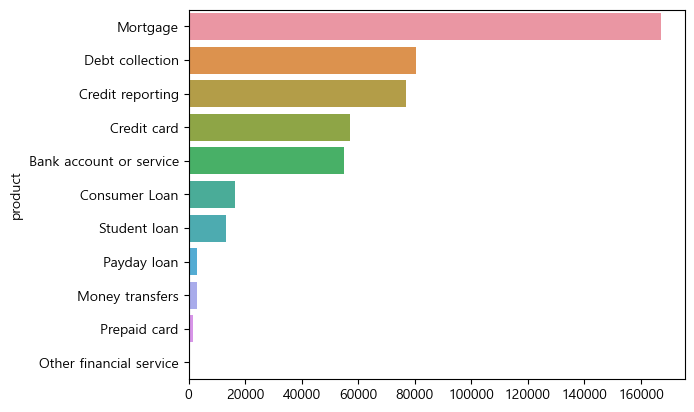

<Figure size 2000x1000 with 0 Axes>

product
Mortgage                   167025
Debt collection             80405
Credit reporting            76819
Credit card                 56977
Bank account or service     55074
Consumer Loan               16459
Student loan                13269
Payday loan                  2988
Money transfers              2886
Prepaid card                 1491
Other financial service       406
Name: count, dtype: int64


In [93]:
# 금융상품 또는 서비스 갯수
df_sorted = df['product'].value_counts().sort_values(ascending=False)
ax = sns.barplot(y=df_sorted.index, x=df_sorted.values)
fig = plt.figure(figsize=(20,10))
plt.show()

print(df['product'].value_counts())
#주택담보 대출 167025
#부채 회수 80405
#신용 보고서 76819
#신용카드 56977
#은행 계좌 또는 서비스 55074
#개인 대출 16459
#학생 대출 13269
#단기 대출 2988
#자금 이체 2886
#선불 카드 1491
#기타 금융 서비스 406

In [94]:
"""금융 상품 또는 서비스 갯수 항목에서 고객 불평으로 가장 많이 선택받은 것은 '주택담보대출'로 167025건이 나왔으며,
이어서 '부채 회수', '신용 보고서'가 80405건, 76819건으로 뒤를 이엇다.
제일 고객 불평이 없던 것은 '선불 카드'이었다."""

"금융 상품 또는 서비스 갯수 항목에서 고객 불평으로 가장 많이 선택받은 것은 '주택담보대출'로 167025건이 나왔으며,\n이어서 '부채 회수', '신용 보고서'가 80405건, 76819건으로 뒤를 이엇다.\n제일 고객 불평이 없던 것은 '선불 카드'이었다."

### 불만이 제기된 하위 상품 또는 서비스 유형(시각화 및 고찰)

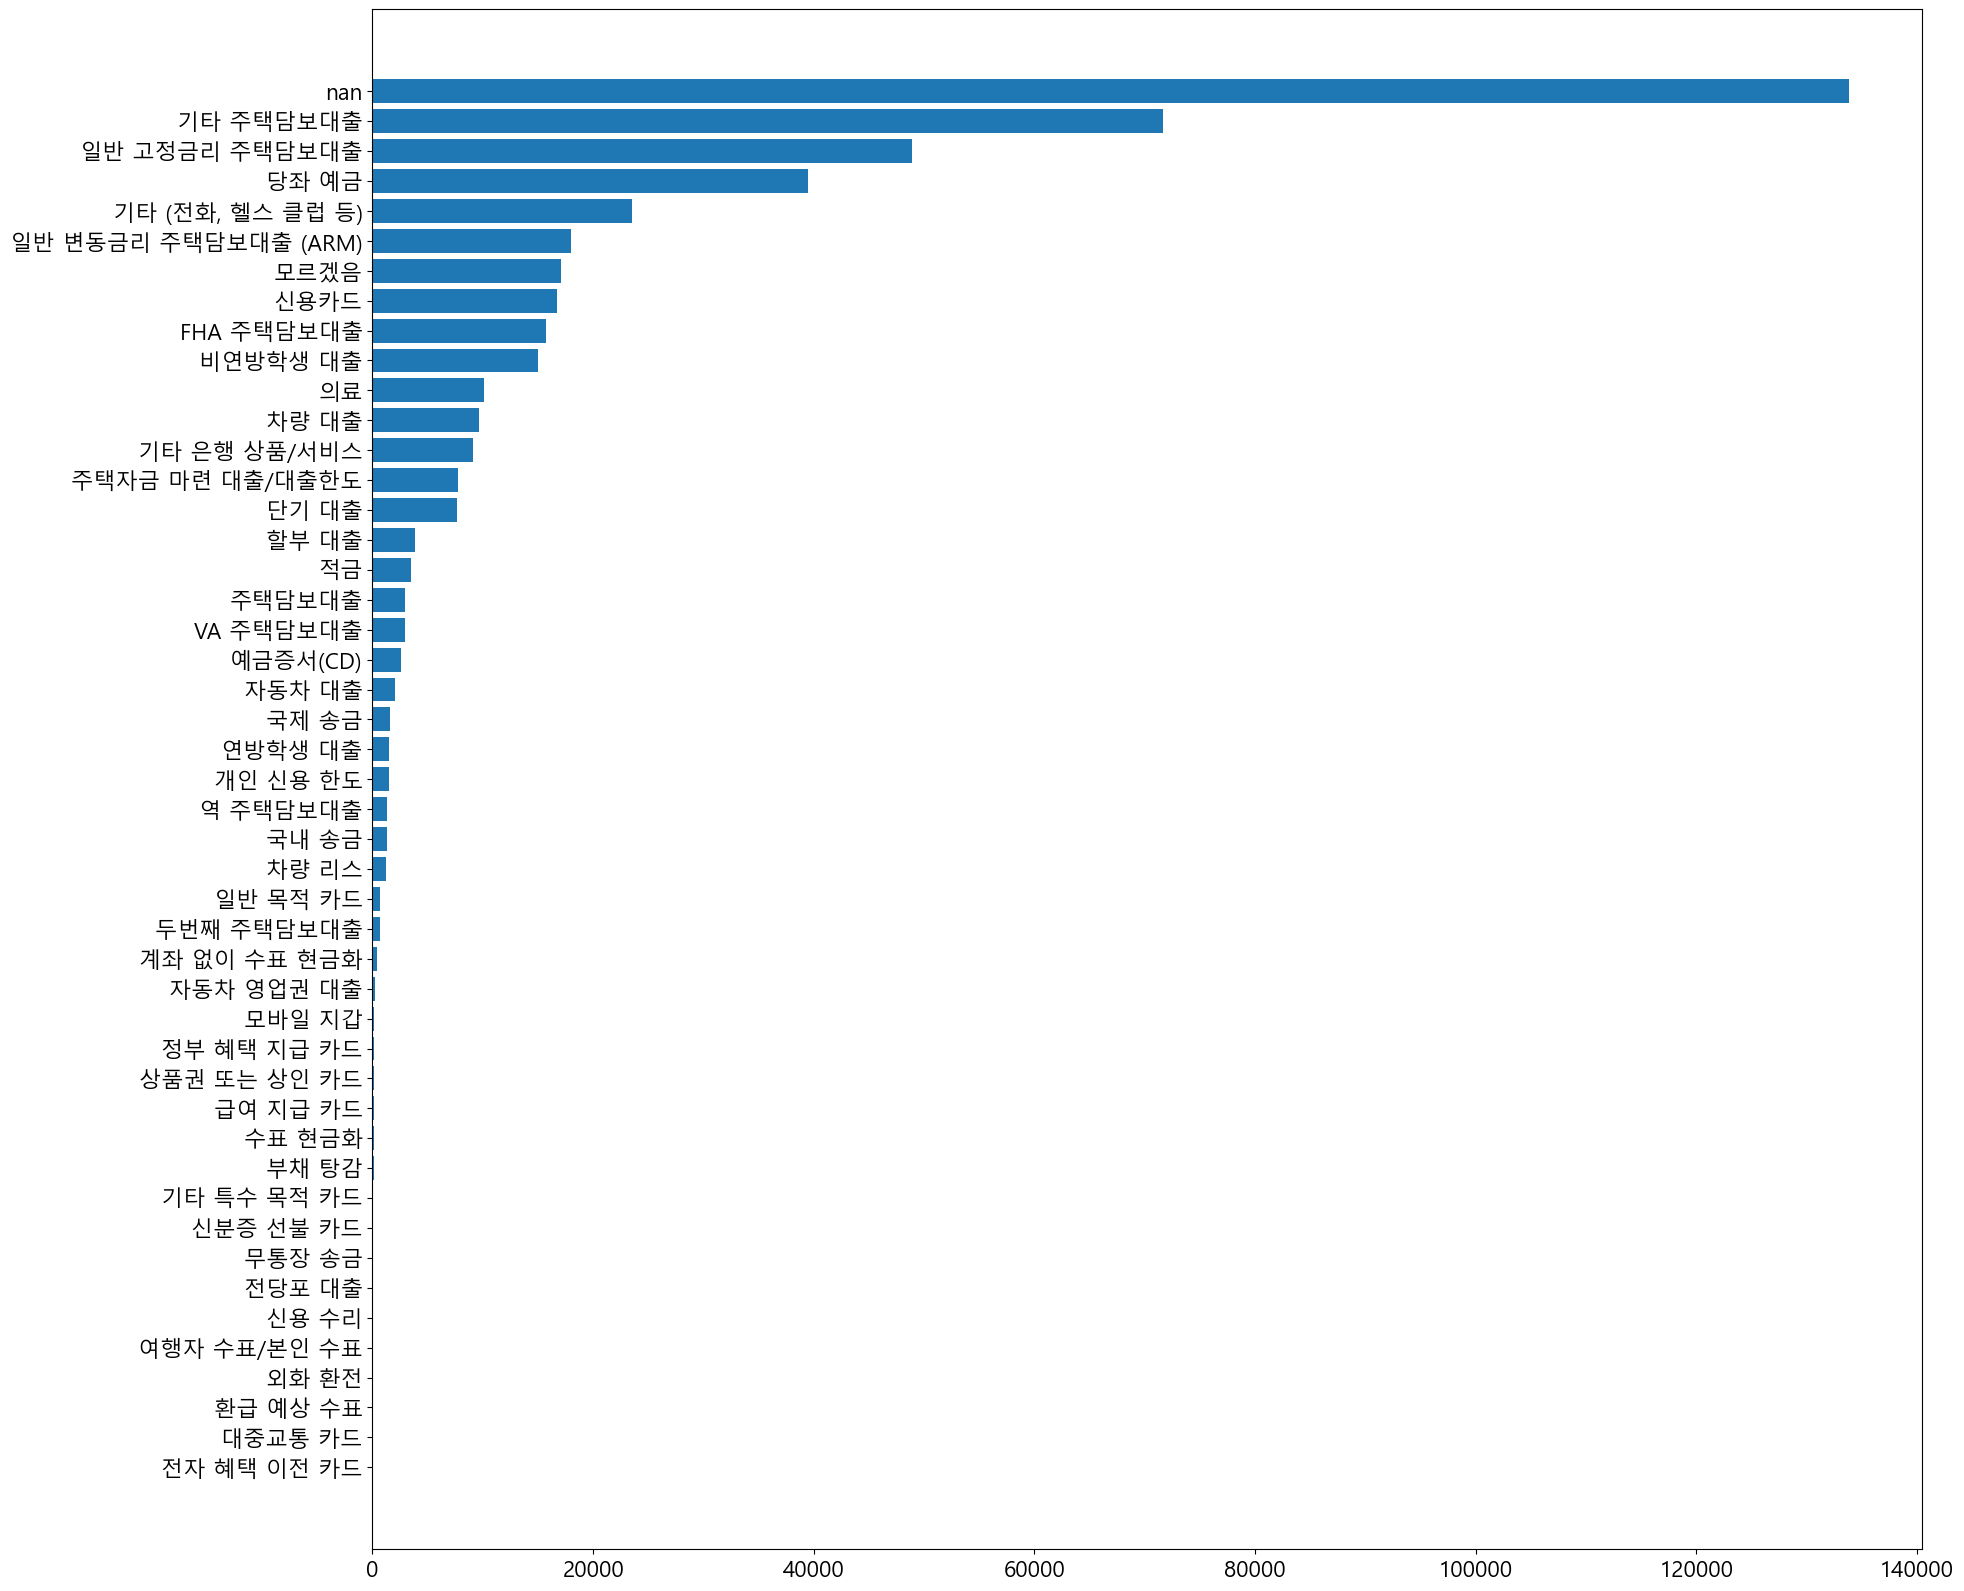

sub_product
nan                     133796
기타 주택담보대출                71654
일반 고정금리 주택담보대출           48934
당좌 예금                    39444
기타 (전화, 헬스 클럽 등)         23480
일반 변동금리 주택담보대출 (ARM)     17974
모르겠음                     17123
신용카드                     16748
FHA 주택담보대출               15755
비연방학생 대출                 15019
의료                       10113
차량 대출                     9668
기타 은행 상품/서비스              9114
주택자금 마련 대출/대출한도           7748
단기 대출                     7665
할부 대출                     3817
적금                        3496
주택담보대출                    2991
VA 주택담보대출                 2974
예금증서(CD)                  2627
자동차 대출                    2030
국제 송금                     1588
연방학생 대출                   1493
개인 신용 한도                  1475
역 주택담보대출                  1328
국내 송금                     1298
차량 리스                     1233
일반 목적 카드                   666
두번째 주택담보대출                 658
계좌 없이 수표 현금화               393
자동차 영업권 대출                 222
모바일 지갑                     

In [98]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Malgun Gothic'
# 불만이 제기된 하위 상품 또는 서비스 유형
sub_product_map = {
    'Other mortgage': '기타 주택담보대출',
    'Conventional fixed mortgage': '일반 고정금리 주택담보대출',
    'Checking account': '당좌 예금',
    'Other (i.e. phone, health club, etc.)': '기타 (전화, 헬스 클럽 등)',
    'Conventional adjustable mortgage (ARM)': '일반 변동금리 주택담보대출 (ARM)',
    'I do not know': '모르겠음',
    'Credit card': '신용카드',
    'FHA mortgage': 'FHA 주택담보대출',
    'Non-federal student loan': '비연방학생 대출',
    'Medical': '의료',
    'Vehicle loan': '차량 대출',
    'Other bank product/service': '기타 은행 상품/서비스',
    'Home equity loan or line of credit': '주택자금 마련 대출/대출한도',
    'Payday loan': '단기 대출',
    'Installment loan': '할부 대출',
    'Savings account': '적금',
    'Mortgage': '주택담보대출',
    'VA mortgage': 'VA 주택담보대출',
    '(CD) Certificate of deposit': '예금증서(CD)',
    'Auto': '자동차 대출',
    'International money transfer': '국제 송금',
    'Federal student loan': '연방학생 대출',
    'Personal line of credit': '개인 신용 한도',
    'Reverse mortgage': '역 주택담보대출',
    'Domestic (US) money transfer': '국내 송금',
    'Vehicle lease': '차량 리스',
    'General purpose card': '일반 목적 카드',
    'Second mortgage': '두번째 주택담보대출',
    'Cashing a check without an account': '계좌 없이 수표 현금화',
    'Title loan': '자동차 영업권 대출',
    'Mobile wallet': '모바일 지갑',
    'Government benefit payment card': '정부 혜택 지급 카드',
    'Gift or merchant card': '상품권 또는 상인 카드',
    'Payroll card': '급여 지급 카드',
    'Check cashing': '수표 현금화',
    'Debt settlement': '부채 탕감',
    'Other special purpose card': '기타 특수 목적 카드',
    'ID prepaid card': '신분증 선불 카드',
    'Money order': '무통장 송금',
    'Pawn loan': '전당포 대출',
    'Credit repair': '신용 수리',
    'Travelerâs/Cashierâs checks': '여행자 수표/본인 수표',
    'Foreign currency exchange': '외화 환전',
    'Refund anticipation check': '환급 예상 수표',
    'Transit card': '대중교통 카드',
    'Electronic Benefit Transfer / EBT card': '전자 혜택 이전 카드'
}
df['sub_product'] = df['sub_product'].replace(sub_product_map)
value_counts = df['sub_product'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(20, 20))
plt.barh(y=value_counts.index, width=value_counts.values)
plt.show() 

print(df['sub_product'].value_counts())


In [99]:
"""금융 상품 세부 항목에서 고객 불평으로 가장 많이 선택받은 것은 '기타 주택담보대출'로 71654건이 나왔으며,
이어서 '일반 고정금리 주택담보대출', '당좌 예금이' 48934건, 39444건으로 뒤를 이엇다.
제일 고객 불평이 없던 것은 '전자 혜택 이전 카드'이었다."""

"금융 상품 세부 항목에서 고객 불평으로 가장 많이 선택받은 것은 '기타 주택담보대출'로 71654건이 나왔으며,\n이어서 '일반 고정금리 주택담보대출', '당좌 예금이' 48934건, 39444건으로 뒤를 이엇다.\n제일 고객 불평이 없던 것은 '전자 혜택 이전 카드'이었다."

In [100]:
# 소비자가 신고에 대해 동의한 정도(제공, 거부, 없음)
df['consumer_consent_provided'].value_counts()

consumer_consent_provided
nan                     419884
Consent not provided     52134
Other                     1778
Consent withdrawn            3
Name: count, dtype: int64

### 소비자가 신고에 대해 동의한 정도(제공, 거부, 없음) 및 제출 방법(시각화 및 고찰)

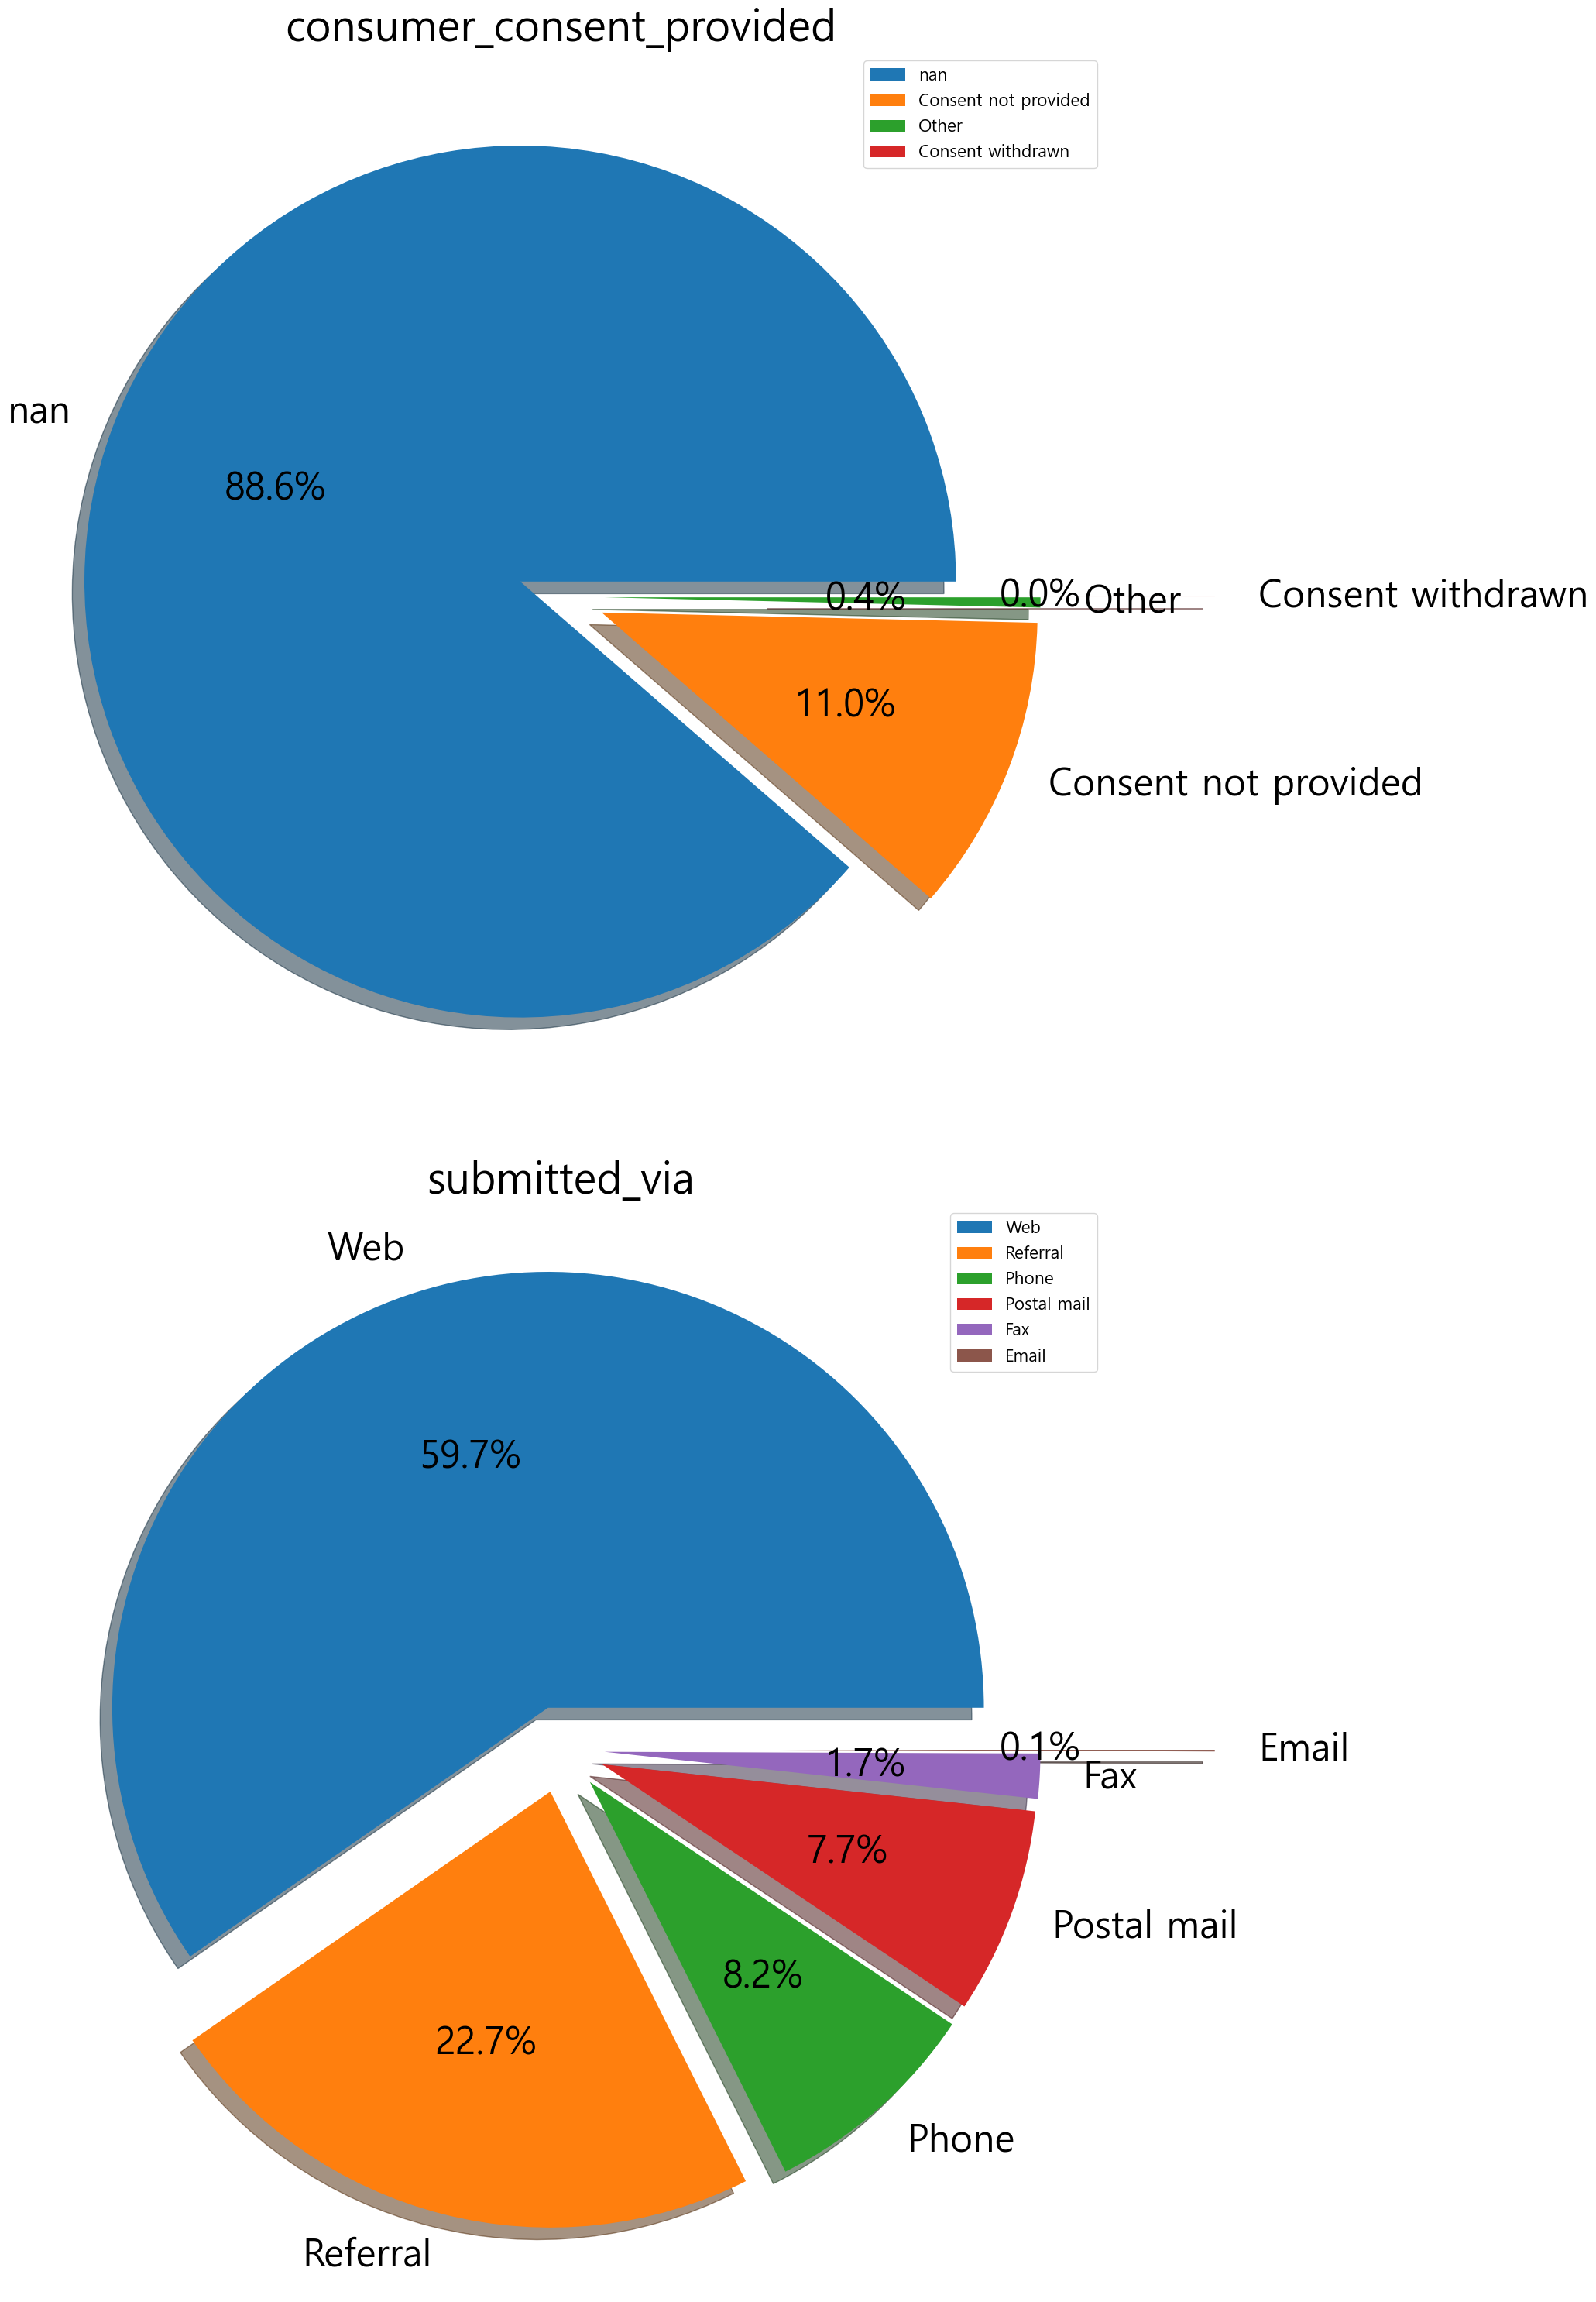

In [110]:
# 소비자가 신고에 대해 동의한 정도(제공, 거부, 없음)
f,ax=plt.subplots(2, figsize=(30,30))
df['consumer_consent_provided'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.5],autopct='%1.1f%%',ax=ax[0],shadow=True, textprops={'fontsize': 35})
ax[0].set_title('consumer_consent_provided', fontsize=40)
ax[0].set_ylabel('')
plt.tight_layout()
ax[0].legend()

# 제출 방법
df['submitted_via'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.5],autopct='%1.1f%%',ax=ax[1],shadow=True, textprops={'fontsize': 35})
ax[1].set_title('submitted_via', fontsize=40)
ax[1].set_ylabel('')
plt.tight_layout()
ax[1].legend()
plt.show()

In [111]:
"""소비자가 신고에 대해 동의한 정도(제공, 거부, 없음)는 '동의 안한다'가 11%로 가장 높았으며, 
그 다음으로 기타가 0.4% '동의 철회'가 0%로 가장 낮았다"""

"""소비자 신고를 제출한 방법(온라인, 이메일 등)은 'web(온라인)'이 59.7%로 가장 높았으며, 이어서 'Referral(추천)'이 22.7%,
'Phone(핸드폰)'dl 8.2%로 그 뒤를 이엇다."""

"소비자 신고를 제출한 방법(온라인, 이메일 등)은 'web(온라인)'이 59.7%로 가장 높았으며, 이어서 'Referral(추천)'이 22.7%,\n'Phone(핸드폰)'dl 8.2%로 그 뒤를 이엇다."

In [112]:
# 신고된 문제(불만)의 유형
df['issue'].unique()

array(['Loan modification,collection,foreclosure',
       'Loan servicing, payments, escrow account',
       'Incorrect information on credit report', 'Repaying your loan',
       'False statements or representation',
       'Application processing delay', 'Credit line increase/decrease',
       'Deposits and withdrawals',
       "Cont'd attempts collect debt not owed",
       'Credit decision / Underwriting',
       'Application, originator, mortgage broker',
       'Communication tactics', 'Late fee',
       'Improper contact or sharing of info', 'Billing disputes',
       'Making/receiving payments, sending money', 'Rewards',
       'Managing the loan or lease', 'Settlement process and costs',
       'Taking/threatening an illegal action',
       'Disclosure verification of debt',
       'Identity theft / Fraud / Embezzlement',
       'Customer service / Customer relations',
       'Forbearance / Workout plans', 'Closing/Cancelling account',
       'Improper use of my credit report'

### 신고된 문제(불만)의 유형(시각화 및 고찰)

issue
대출 수정, 채권 징수, 환급        89675
신용 보고서에 잘못된 정보          56713
대출 서비스, 상환, 에스크로 계정     52357
지급하지 않아도 되는 채무 청구 시도    33456
계정 개설, 종료 또는 관리         23570
                        ...  
분실 또는 도난된 모니 오더            17
잘못된 환율                     11
대출 기관이 차량을 손상 또는 파괴함        4
대출 기관이 재산을 판매함              3
대출 기관이 재산을 손상 또는 파괴함        1
Name: count, Length: 95, dtype: int64


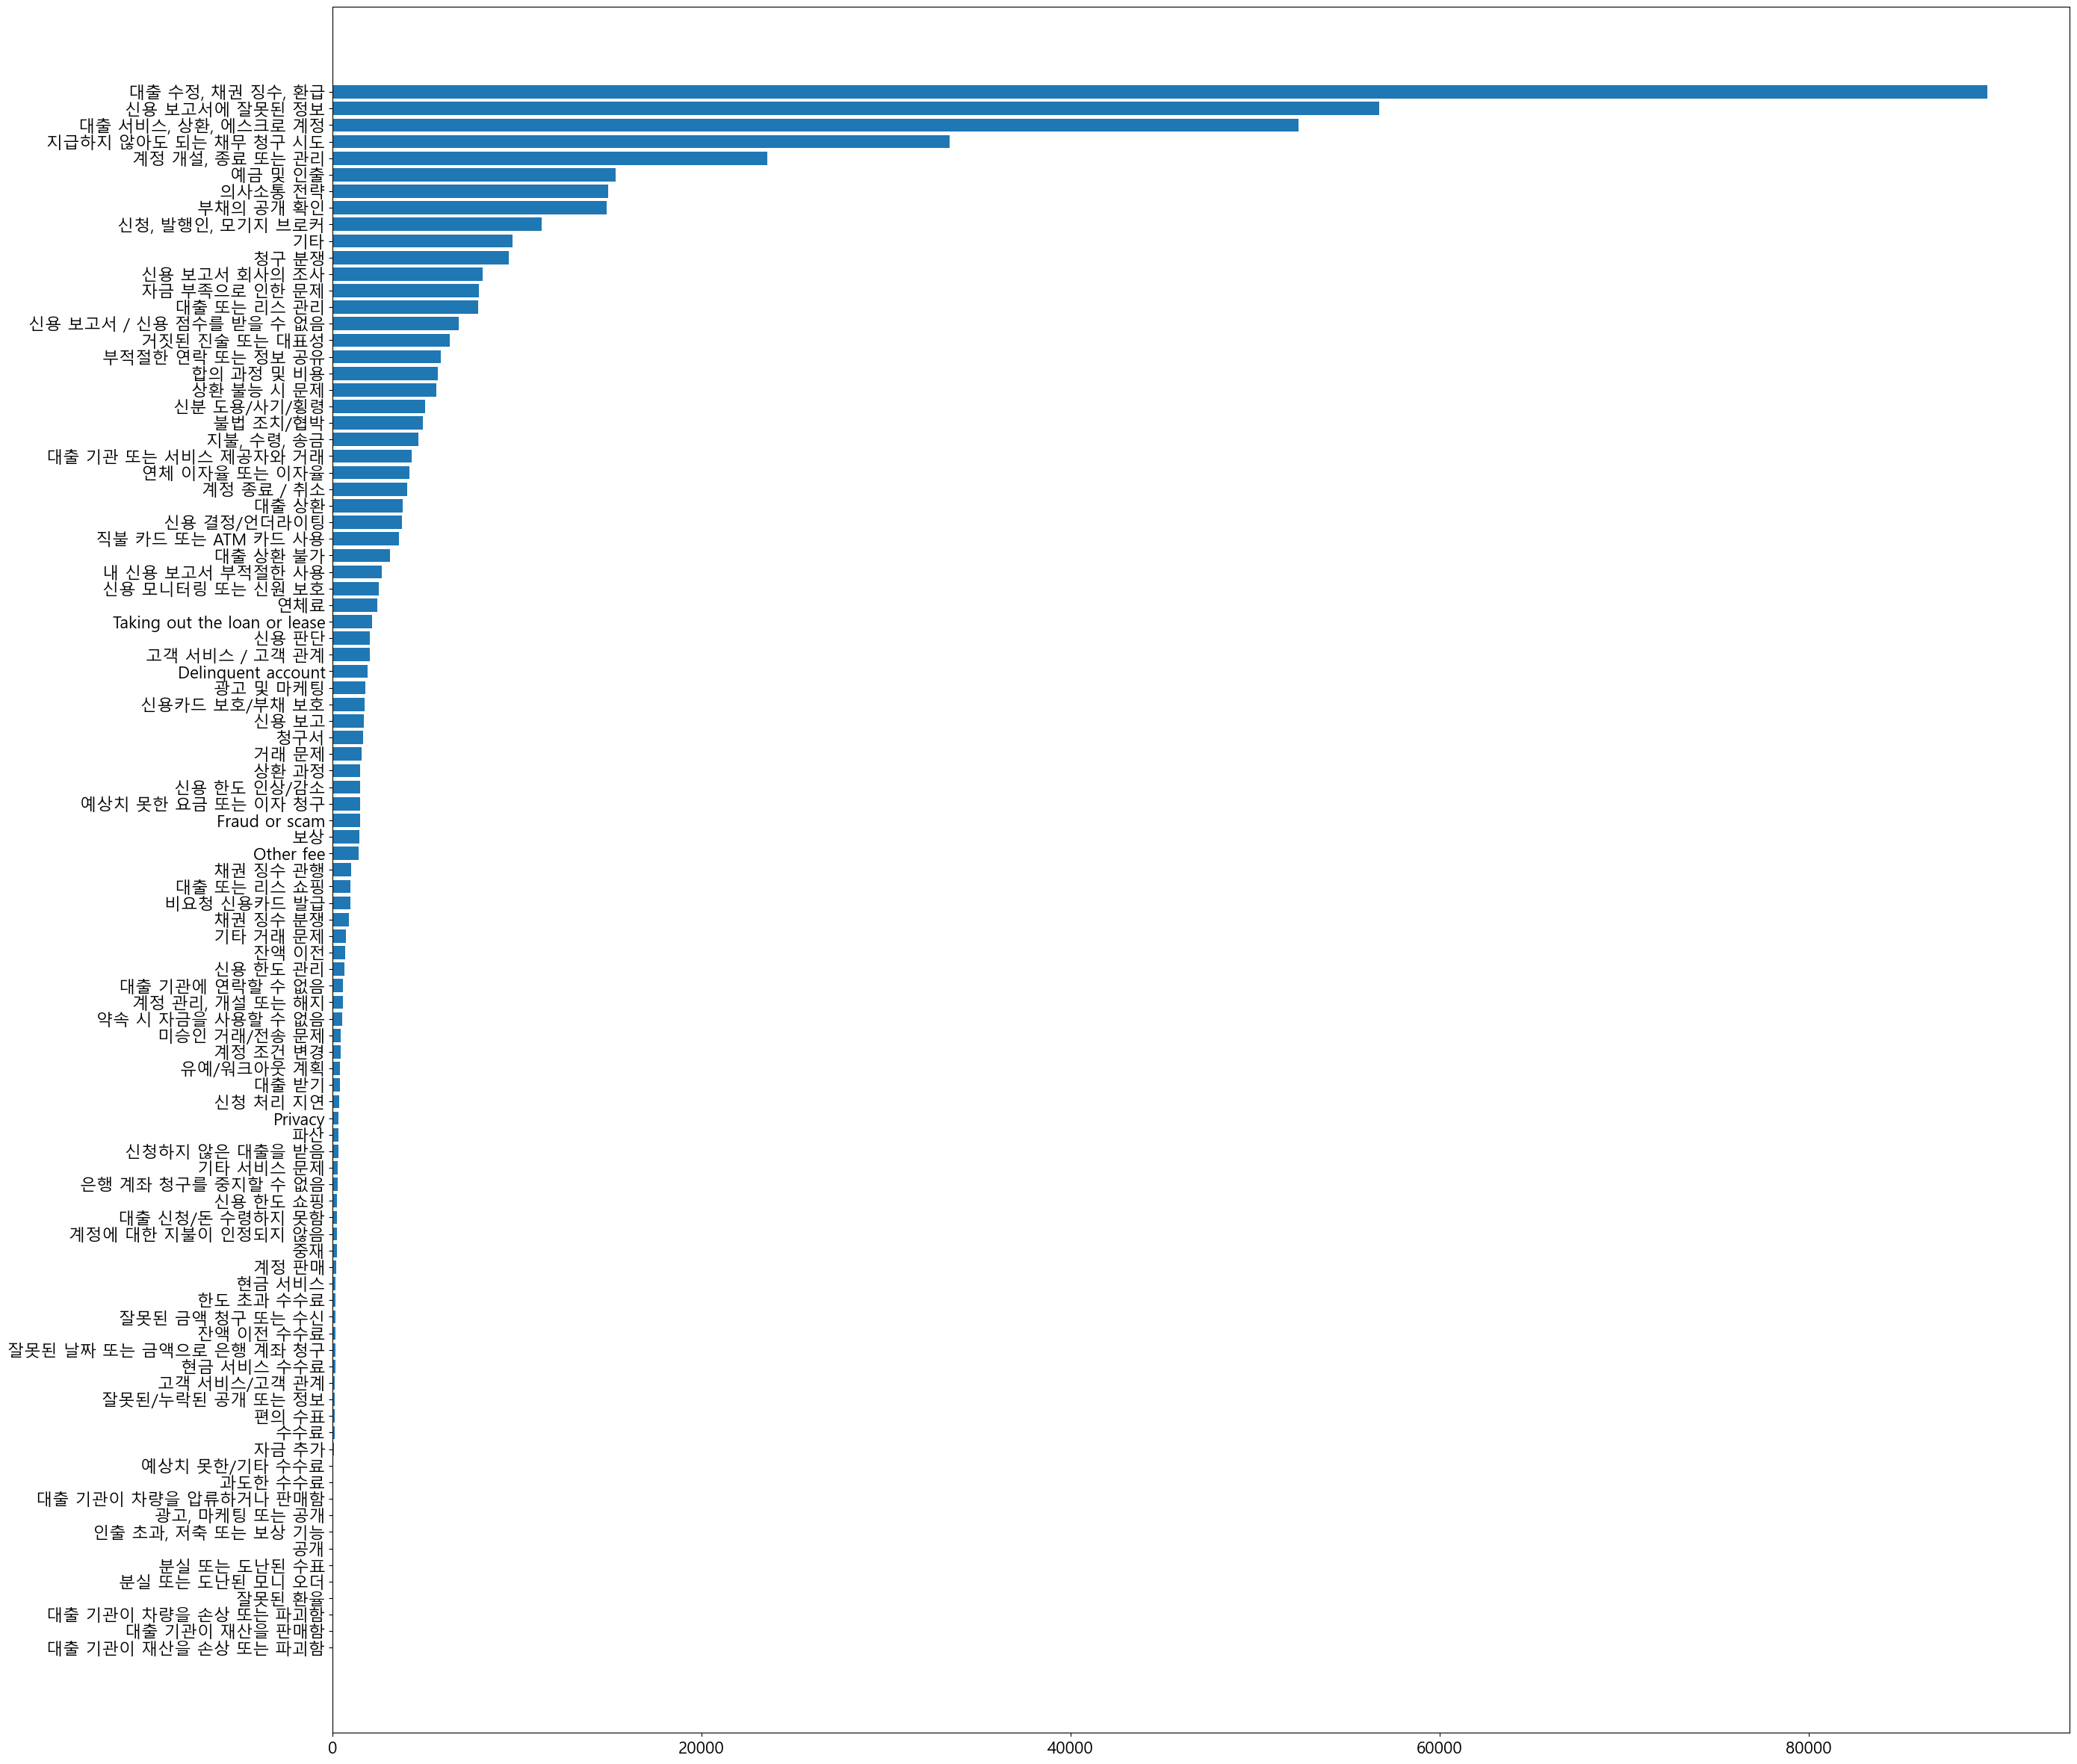

In [114]:
# 신고된 문제(불만)의 유형
import matplotlib.pyplot as plt
print(df['issue'].value_counts())
plt.rcParams['font.family'] = 'Malgun Gothic'
sub_issue_map = {
    'Loan modification,collection,foreclosure': '대출 개선, 수금, 집 탈모',
    'Loan servicing, payments, escrow account': '대출 서비스, 상환, 에스크로 계좌',
    'Incorrect information on credit report': '신용 보고서의 잘못된 정보',
    'Repaying your loan': '대출 상환',
    'False statements or representation': '거짓된 진술 또는 대표성',
    'Application processing delay': '신청 처리 지연',
    'Credit line increase/decrease': '신용 한도 인상/감소',
    'Deposits and withdrawals': '예금 및 인출',
    "Cont'd attempts collect debt not owed": '지급하지 않아도 되는 채무 청구 시도',
    'Credit decision / Underwriting': '신용 심사 / 언더라이팅',
    'Application, originator, mortgage broker': '신청, 원천자, 모기지 브로커',
    'Communication tactics': '의사 소통 전략',
    'Late fee': '연체료',
    'Improper contact or sharing of info': '부적절한 연락 또는 정보 공유',
    'Billing disputes': '청구 분쟁',
    'Making/receiving payments, sending money': '지불 / 수령, 송금',
    'Rewards': '보상',
    'Managing the loan or lease': '대출 또는 리스 관리',
    'Settlement process and costs': '해결 과정 및 비용',
    'Taking/threatening an illegal action': '불법 행위 / 위협',
    'Disclosure verification of debt': '채무 확인 공시',
    'Identity theft / Fraud / Embezzlement': '신분 도용 / 사기 / 횡령',
    'Customer service / Customer relations': '고객 서비스 / 고객 관계',
    'Forbearance / Workout plans': '유예 / 운동 계획',
    'Closing/Cancelling account': '계정 종료 / 취소',
    'Improper use of my credit report': '내 신용 보고서 부적절한 사용',
    'Account opening, closing, or management': '계정 개설, 종료 또는 관리',
    "Credit reporting company's investigation": '신용 보고서 회사 조사',
    'APR or interest rate': '연체 이자율 또는 이자율',
    'Problems when you are unable to pay': '상환 불능 시 문제',
    'Credit monitoring or identity protection': '신용 모니터링 또는 신원 보호',
    'Balance transfer': '잔액 이전',
    'Unable to get credit report/credit score': '신용 보고서 / 신용 점수를 받을 수 없음',
    'Wrong amount charged or received': '잘못된 금액 청구 또는 수신',
    'Account terms and changes': '계정 조건 변경',
    'Billing statement': '청구서',
    'Billing disputes': '청구 분쟁',
    'Late fee': '연체료',
    "Credit reporting company's investigation": '신용 보고서 회사의 조사',
    'Incorrect information on credit report': '신용 보고서에 잘못된 정보',
    "Problem with a credit reporting company's investigation into an existing problem": '기존 문제에 대한 신용 보고서 회사의 조사 문제',
    'Attempts to collect debt not owed': '미지급 채무 징수 시도',
    'Loan servicing, payments, escrow account': '대출 서비스, 상환, 에스크로 계정',
    'Application, originator, mortgage broker': '신청, 발행인, 모기지 브로커',
    'Loan modification,collection,foreclosure': '대출 수정, 채권 징수, 환급',
    'Trouble during payment process': '지불 과정에서 문제 발생',
    'Problems caused by my funds being low': '자금 부족으로 인한 문제',
    'Taking/threatening an illegal action': '불법 조치/협박',
    'Billing statement': '청구서',
    'Communication tactics': '의사소통 전략',
    'False statements or representation': '거짓된 진술 또는 대표성',
    'Managing the loan or lease': '대출 또는 리스 관리',
    'Disclosure verification of debt': '부채의 공개 확인',
    'Other features, terms, or problems': '기타 기능, 조건 또는 문제',
    'Managing, opening, or closing account': '계정 관리, 개설 또는 해지',
    'Deposits and withdrawals': '예금 및 인출',
    'Application processing delay': '신청 처리 지연',
    'Credit decision / Underwriting': '신용 결정/언더라이팅',
    'Other': '기타',
    'Credit monitoring or identity protection': '신용 모니터링 또는 신원 보호',
    'Credit reporting': '신용 보고',
    'Incorrect/missing disclosures or info': '잘못된/누락된 공개 또는 정보',
    'Making/receiving payments, sending money': '지불, 수령, 송금',
    'Using a debit or ATM card': '직불 카드 또는 ATM 카드 사용',
    'Transaction issue': '거래 문제',
    'Credit card protection / Debt protection': '신용카드 보호/부채 보호',
    'Payoff process': '상환 과정',
    'Credit determination': '신용 판단',
    'Forbearance / Workout plans': '유예/워크아웃 계획',
    'Settlement process and costs': '합의 과정 및 비용',
    'Identity theft / Fraud / Embezzlement': '신분 도용/사기/횡령',
    'Other transaction issues': '기타 거래 문제',
    'Sale of account': '계정 판매',
    'Convenience checks': '편의 수표',
    'Money was not available when promised': '약속 시 자금을 사용할 수 없음',
    'Bankruptcy': '파산',
    'Unsolicited issuance of credit card': '비요청 신용카드 발급',
    'Advertising and marketing': '광고 및 마케팅',
    'Shopping for a loan or lease': '대출 또는 리스 쇼핑',
    'Managing the line of credit': '신용 한도 관리',
    'Other service issues': '기타 서비스 문제',
    'Cash advance': '현금 서비스',
    'Cash advance fee': '현금 서비스 수수료',
    'Overlimit fee': '한도 초과 수수료',
    'Getting a loan': '대출 받기',
    "Charged fees or interest I didn't expect": '예상치 못한 요금 또는 이자 청구',
    'Arbitration': '중재',
    'Charged bank acct wrong day or amt': '잘못된 날짜 또는 금액으로 은행 계좌 청구',
    'Applied for loan/did not receive money': '대출 신청/돈 수령하지 못함',
    "Can't contact lender": '대출 기관에 연락할 수 없음',
    'Payment to acct not credited': '계정에 대한 지불이 인정되지 않음',
    "Can't stop charges to bank account": '은행 계좌 청구를 중지할 수 없음',
    "Received a loan I didn't apply for": '신청하지 않은 대출을 받음',
    'Shopping for a line of credit': '신용 한도 쇼핑',
    'Dealing with my lender or servicer': '대출 기관 또는 서비스 제공자와 거래',
    "Can't repay my loan": '대출 상환 불가',
    'Balance transfer fee': '잔액 이전 수수료',
    'Fees': '수수료',
    'Customer service/Customer relations': '고객 서비스/고객 관계',
    'Lost or stolen money order': '분실 또는 도난된 모니 오더',
    'Adding money': '자금 추가',
    'Unauthorized transactions/trans. issues': '미승인 거래/전송 문제',
    'Lost or stolen check': '분실 또는 도난된 수표',
    'Lender repossessed or sold the vehicle': '대출 기관이 차량을 압류하거나 판매함',
    'Advertising, marketing or disclosures': '광고, 마케팅 또는 공개',
    'Unexpected/Other fees': '예상치 못한/기타 수수료',
    'Overdraft, savings or rewards features': '인출 초과, 저축 또는 보상 기능',
    'Incorrect exchange rate': '잘못된 환율',
    'Disclosures': '공개',
    'Excessive fees': '과도한 수수료',
    'Lender sold the property': '대출 기관이 재산을 판매함',
    'Lender damaged or destroyed vehicle': '대출 기관이 차량을 손상 또는 파괴함',
    'Lender damaged or destroyed property': '대출 기관이 재산을 손상 또는 파괴함',
    'Credit reporting': '신용 보고',
    'Collection practices': '채권 징수 관행',
    'Collection debt dispute': '채권 징수 분쟁'
}
df['issue'] = df['issue'].replace(sub_issue_map)
df['issue'].value_counts()
value_counts = df['issue'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(30, 30))
plt.barh(y=value_counts.index, width=value_counts.values)
plt.show() 

In [115]:
"""고객들이 신고한 문제(불만)의 유형으로 가장 많은 것은 '대출 수정, 채권 징수, 환급'으로 89675건,
그 다음으로는 '신용 보고서에 잘못된 정보', '대출 서비스, 상환, 에스크로 계정'이 56713건, 52357건으로 그 뒤를 이엇다.
그리고 가장 신고한 문제가 없던 것은 '대출 기관이 재산을 손상 또는 파괴함'이었다."""

"고객들이 신고한 문제(불만)의 유형으로 가장 많은 것은 '대출 수정, 채권 징수, 환급'으로 89675건,\n그 다음으로는 '신용 보고서에 잘못된 정보', '대출 서비스, 상환, 에스크로 계정'이 56713건, 52357건으로 그 뒤를 이엇다.\n그리고 가장 신고한 문제가 없던 것은 '대출 기관이 재산을 손상 또는 파괴함'이었다."

### 상세한 불만 유형(unique 갯수 및 고찰)

In [116]:
# 상세한 불만 유형
df['sub_issue'].value_counts().sort_values(ascending=True)

sub_issue
Insurance terms                                  4
Qualify for a better loan than offered          82
Report shared with employer w/o consent         96
Received marketing offer after opted out       102
Can't qualify for a loan                       115
                                             ...  
Not given enough info to verify debt         10542
Information is not mine                      16704
Debt is not mine                             20933
Account status                               24016
nan                                         300318
Name: count, Length: 69, dtype: int64

In [117]:
"""고객들이 신고한 상세한(불만)의 유형으로는 'Account status(계좌상태)'가 24016건으로 가장 많았으며, 
그 다음으로 'Debt is not mine(빚이 내 것이 아니다)'가 20933건, 
그 다음으로 'Information is not mine(정보가 자신의 것이 아니다)'가 16704건으로 그 뒤를 이엇다.
그리고 가장 신고가 없던 것은 'Insurance terms(보험기간)'이었다."""

"고객들이 신고한 상세한(불만)의 유형으로는 'Account status(계좌상태)'가 24016건으로 가장 많았으며, \n그 다음으로 'Debt is not mine(빚이 내 것이 아니다)'가 20933건, \n그 다음으로 'Information is not mine(정보가 자신의 것이 아니다)'가 16704건으로 그 뒤를 이엇다.\n그리고 가장 신고가 없던 것은 'Insurance terms(보험기간)'이었다."

### 카이제곱검정 수행(product와 issue의 관계)

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

# 분할표 생성
observed = pd.crosstab(df['product'], df['issue'])

# 기대도수가 5 이상인 셀만 선택
observed = observed[observed.sum(axis=1) >= 5]
observed = observed.loc[:, observed.sum(axis=0) >= 5]

# 카이제곱 검정 수행
stat, p, dof, expected = chi2_contingency(observed)

# 결과 출력
print("Chi-square statistic:", stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 4337541.615884611
p-value: 0.0
Degrees of freedom: 910
Expected frequencies:
 [[2.19928213e+02 1.70990698e+02 1.63435025e+02 ... 6.61179533e+02
  2.01097150e+01 1.60412756e+01]
 [6.56941394e+01 5.10761517e+01 4.88192178e+01 ... 1.97499083e+02
  6.00691655e+00 4.79164442e+00]
 [2.27527505e+02 1.76899027e+02 1.69082279e+02 ... 6.84025606e+02
  2.08045763e+01 1.65955580e+01]
 ...
 [1.19320460e+01 9.27697656e+00 8.86704897e+00 ... 3.58718169e+01
  1.09103803e+00 8.70307794e-01]
 [5.95404303e+00 4.62917405e+00 4.42462183e+00 ... 1.78998926e+01
  5.44423596e-01 4.34280094e-01]
 [5.29873890e+01 4.11968547e+01 3.93764635e+01 ... 1.59298239e+02
  4.84504138e+00 3.86483070e+00]]


In [ ]:
"""
귀무가설(H0): 두 범주형 변수 간에는 상관관계가 없다. 즉, 두 변수는 서로 독립적이다.
대립가설(H1): 두 범주형 변수 간에는 상관관계가 있다. 즉, 두 변수는 서로 독립적이지 않다.
이고,

카이제곱검정은 두 개 이상의 범주형 변수인 경우에 사용가능하고, 조건인 기대도수가 5이상인 셀만 선택하는 것이므로,
위의 경우에는 p-value < 0.05이므로 귀무가설 기각, product와 issue 변수 간에는 상관관계가 있음을 알 수가 있었다.
"""


## 랜덤포레스트를 적용하여 product와 issue간의 분류정확도 확인

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(df[['product']], df['issue'], test_size=0.3, random_state=0)

# 라벨인코더(범주형변수 -> 수치형변수)
le = LabelEncoder()
df['product'] = le.fit_transform(df['product'])
df['issue'] = le.fit_transform(df['issue'])

# 모델 학습 및 예측
rfc = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators': [10,20,30,40,50,100], 'max_depth': [500, 5000]}
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터를 사용하여 모델 재학습
best_params = grid_search.best_params_
rfc_best = RandomForestClassifier(random_state=0, **best_params)
rfc_best.fit(X_train, y_train)

# 모델 예측 및 평가
y_pred = rfc_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy: {accuracy:.2f}")

Classification accuracy: 0.48


In [ ]:
""" - n_estimators의 값을 [10,50,100]에서 [10,20,30,40,50,100]으로 바꿈
    : 분류정확도 48% -> 분류정확도 48%
    - max_depth의 값을 [5, 10, None]에서 [500, 5000]으로 변경
    : 분류정확도 48% -> 분류정확도 48%
    - random_state = 42에서 0으로 변경
    : 분류정확도 48% -> 분류정확도 48%
    - grid search cv 주석처리함
    : 분류정확도 48% -> 분류정확도 48%"""

## 로지스틱 회귀분석을 적용하여 product와 issue간의 분류정확도 확인

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 범주형 변수 라벨 인코딩
le = LabelEncoder()
df['product'] = le.fit_transform(df['product'])
df['issue'] = le.fit_transform(df['issue'])

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(df[['product']], df['issue'], test_size=0.3, random_state=0)

# 로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# 모델 예측 및 평가
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy: {accuracy:.2f}")

Classification accuracy: 0.45


C:\Users\minji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
""" 로지스틱 회귀분석 결과
    분류정확도 45%"""

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(df[['product']], df['issue'], test_size=0.3, random_state=0)

# 라벨인코더(범주형변수 -> 수치형변수)
le = LabelEncoder()
df['product'] = le.fit_transform(df['product'])
df['issue'] = le.fit_transform(df['issue'])

# 모델 학습 및 예측
svc = SVC(random_state=0)
params = {'C': [0.01, 0.1, 1, 10, 100],
          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(svc, params, cv=5)
grid_search.fit(X_train, y_train)
svc_best = grid_search.best_estimator_

# 모델 평가
y_pred = svc_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy: {accuracy:.2f}")

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
""" SVC 실행결과
    (1)분류정확도 48%
    (2)'C': [0.01, 0.1, 1, 10, 100]
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'] 적용
       분류정확도 진행중..."""